In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from NeuralNetFuncs import preprocess_data, create_model
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

In [2]:
# Load the data
train_df = pd.read_csv('train_pca.csv')
X_train_df = train_df.drop(columns=['target'])
y_train_df = train_df['target']

test_df = pd.read_csv('test_pca.csv')
X_val_df = test_df.drop(columns=['target'])
y_val_df = test_df['target']

# Apply RobustScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_df)  # Fit on train, transform train
X_val_scaled = scaler.transform(X_val_df)         # Transform validation with the same scaler

# One-hot encode target variables
y_train_encoded = to_categorical(y_train_df, num_classes=4)
y_val_encoded = to_categorical(y_val_df, num_classes=4)

Data points:  5168
Category 0: 1292
Category 1: 1292
Category 2: 1292
Category 3: 1292


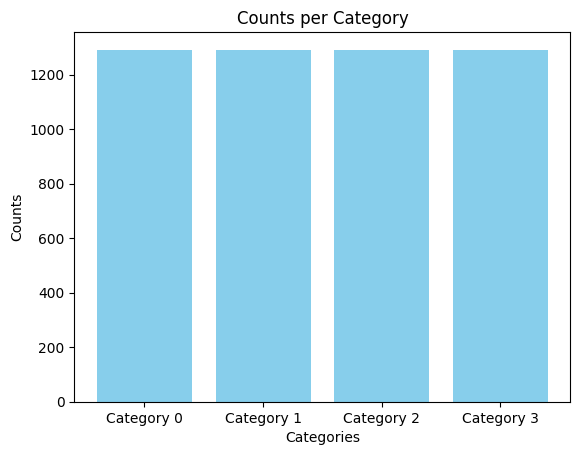

In [3]:
import matplotlib.pyplot as plt

print("Data points: ", len(X_train_df))
print("Category 0:", (y_train_df == 0).sum())
print("Category 1:", (y_train_df == 1).sum())
print("Category 2:", (y_train_df == 2).sum())
print("Category 3:", (y_train_df == 3).sum())

counts = [(y_train_df == 0).sum(), (y_train_df == 1).sum(), (y_train_df == 2).sum(), (y_train_df == 3).sum()]
categories = ["Category 0", "Category 1", "Category 2", "Category 3"]

# Creating the bar graph
plt.bar(categories, counts, color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Counts per Category')
plt.show()

In [7]:
# Define the model (ensure create_model accepts the number of input features)
model = create_model(X_train_scaled.shape[1])


history = model.fit(
    X_train_scaled,        
    y_train_encoded,
    validation_data=(X_val_scaled, y_val_encoded),  
    epochs=200,
    batch_size=64,
    verbose=1
)


Epoch 1/200


/Users/eric/Desktop/Fall 2024/CS 7641/Internet-Use/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3457 - loss: 1.9253 - val_accuracy: 0.5693 - val_loss: 1.5105
Epoch 2/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - accuracy: 0.5296 - loss: 1.5068 - val_accuracy: 0.5389 - val_loss: 1.3807
Epoch 3/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - accuracy: 0.5618 - loss: 1.3254 - val_accuracy: 0.5541 - val_loss: 1.2741
Epoch 4/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.5674 - loss: 1.2311 - val_accuracy: 0.5427 - val_loss: 1.2464
Epoch 5/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - accuracy: 0.5853 - loss: 1.1509 - val_accuracy: 0.5560 - val_loss: 1.1808
Epoch 6/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.5972 - loss: 1.1064 - val_accuracy: 0.5465 - val_loss: 1.1552
Epoch 7/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - accuracy: 0.6051 - loss: 1.0560 - val_accuracy: 0.5541 - val_loss: 1.1374
Epoch 8/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.6107 - loss: 1.0337 - val_accuracy: 0.5541 -

In [8]:
# Evaluate
y_train_pred = np.argmax(model.predict(X_train_df), axis=1)
y_val_pred = np.argmax(model.predict(X_val_df), axis=1)
y_train_true = np.argmax(y_train_encoded, axis=1)
y_val_true = np.argmax(y_val_encoded, axis=1)

# Calculate accuracy
train_accuracy = (y_train_pred == y_train_true).mean()
val_accuracy = (y_val_pred == y_val_true).mean()

print(f"\nTraining Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step

Training Accuracy: 0.6221
Validation Accuracy: 0.6243


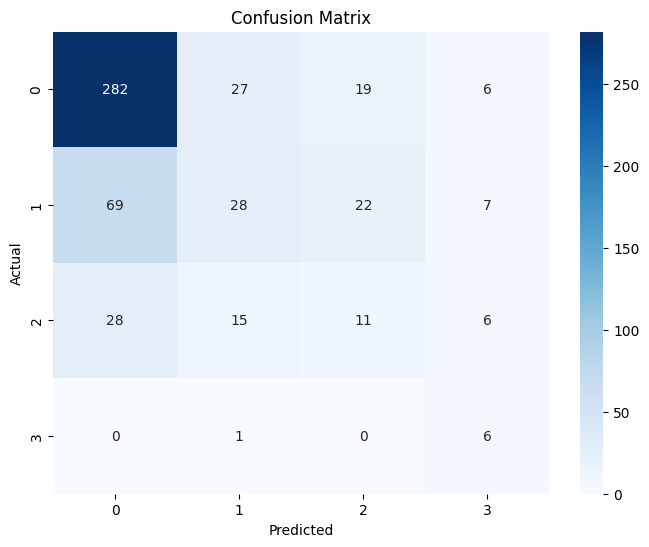


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.84      0.79       334
           1       0.39      0.22      0.28       126
           2       0.21      0.18      0.20        60
           3       0.24      0.86      0.38         7

    accuracy                           0.62       527
   macro avg       0.40      0.53      0.41       527
weighted avg       0.59      0.62      0.60       527



In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_val_true, y_val_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_val_true, y_val_pred))